Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [ ]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time
# Start time
start_time = time.time()
# Generate a pandas DataFrame with 1 million rows and 1 column of random integers between 1 and 100
df_pandas = pd.DataFrame({'Random_Numbers': np.random.randint(1, 101, size=1000000)})
# End time
end_time = time.time()
# Calculate the time taken
time_pandas = end_time - start_time
print(f"Pandas time: {time_pandas} seconds")

# Start time
start_time = time.time()
# Generate a NumPy array with 1 million random integers between 1 and 100
np_random_numbers = np.random.randint(1, 101, size=1000000)
# End time
end_time = time.time()
# Calculate the time taken
time_numpy = end_time - start_time
print(f"NumPy time: {time_numpy} seconds")

# Compare which one is faster
print(f"Pandas is faster" if time_pandas < time_numpy else "NumPy is faster")

print(f"Which one is faster and why?")
print(f"NumPy is generally faster for numerical operations because it is implemented in C and operates on arrays, which are contiguous blocks of memory. This allows for faster access and manipulation of data. Pandas is built on top of NumPy and provides a higher-level, more flexible interface for data manipulation. However, this flexibility comes at the cost of some overhead, making it slower for simple numerical operations like generating random numbers.")

AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [ ]:
# Write your code for AIM #2 here
import numpy as np
import pandas as pd
import time

# Loading the CSV file as an array in Pandas
df = pd.read_csv('sleep_health.csv')
# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

# Calculate the mean of 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate', and 'Daily Steps'
mean_values = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
# Print the mean values
print(mean_values)

# Select only numerical columns
# The DataFrame has columns like 'Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps'
numerical_cols = df.select_dtypes(include=[float, int]).columns
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()
# Print the full correlation matrix
print("Full Correlation Matrix:")
print(correlation_matrix)
# Extract specific correlations
# Correlation between 'Sleep Duration' and 'Age'
sleep_duration_age_corr = correlation_matrix['Sleep Duration']['Age']
# Correlation between 'Sleep Duration' and 'Heart Rate'
sleep_duration_hr_corr = correlation_matrix['Sleep Duration']['Heart Rate']
# Correlation between 'Sleep Duration' and 'Daily Steps'
sleep_duration_steps_corr = correlation_matrix['Sleep Duration']['Daily Steps']
# Print specific correlations
print(f"Correlation between Sleep Duration and Age: {sleep_duration_age_corr}")
print(f"Correlation between Sleep Duration and Heart Rate: {sleep_duration_hr_corr}")
print(f"Correlation between Sleep Duration and Daily Steps: {sleep_duration_steps_corr}")

# Calculate the standard deviation for 'Sleep Duration'
sleep_duration_std = df['Sleep Duration'].std()
# Print the standard deviation
print(f"Standard Deviation for Sleep Duration: {sleep_duration_std}")

# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column
age = data['Age'].astype(int)
sleep_duration = data['Sleep Duration'].astype(float)
systolic_blood_pressure = data['Systolic blood pressure'].astype(int)
diastolic_blood_pressure = data['Diastolic blood pressure'].astype(int)
heart_rate = data['Heart Rate'].astype(int)
daily_steps = data['Daily Steps'].astype(int)
# Calculate the mean of the specified columns
mean_sleep_duration = np.mean(sleep_duration)
mean_systolic_blood_pressure = np.mean(systolic_blood_pressure)
mean_diastolic_blood_pressure = np.mean(diastolic_blood_pressure)
mean_heart_rate = np.mean(heart_rate)
mean_daily_steps = np.mean(daily_steps)
# Print the mean values
print(f"Mean Sleep Duration: {mean_sleep_duration}")
print(f"Mean Systolic Blood Pressure: {mean_systolic_blood_pressure}")
print(f"Mean Diastolic Blood Pressure: {mean_diastolic_blood_pressure}")
print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Mean Daily Steps: {mean_daily_steps}")

numerical_data = data[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']]
# Calculate the correlation in NumPy using np.corrcoef()
numerical_data = numerical_data.astype(float)
correlation_matrix = np.corrcoef(numerical_data.T)
# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]
# Correlation between 'Sleep Duration' and 'Age'
sleep_duration_age_corr = correlation_matrix[0, 1]
# Correlation between 'Sleep Duration' and 'Heart Rate'
sleep_duration_hr_corr = correlation_matrix[0, 2]
# Correlation between 'Sleep Duration' and 'Daily Steps'
sleep_duration_steps_corr = correlation_matrix[0, 3]
# Print specific correlations
print(f"Correlation between Sleep Duration and Age: {sleep_duration_age_corr}")
print(f"Correlation between Sleep Duration and Heart Rate: {sleep_duration_hr_corr}")
print(f"Correlation between Sleep Duration and Daily Steps: {sleep_duration_steps_corr}")

# Use np-std() to calculate Standard deviation
sleep_duration_std = np.std(data['Sleep Duration'].astype(float))
# Print the standard deviation
print(f"Standard Deviation for Sleep Duration: {sleep_duration_std}")

# Start time for pandas
start_time_pandas = time.time()
# Load dataset with pandas
df = pd.read_csv('sleep_health.csv')
# Calculate standard deviation with pandas
sleep_duration_std_pandas = df['Sleep Duration'].std()
# End time for pandas
end_time_pandas = time.time()
# Start time for NumPy
start_time_numpy = time.time()
# Load dataset with NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=None, encoding='utf-8', names=True)
# Calculate standard deviation with NumPy
sleep_duration_std_numpy = np.std(data['Sleep Duration'].astype(float))
# End time for NumPy
end_time_numpy = time.time()
# Calculate time differences
time_pandas = end_time_pandas - start_time_pandas
time_numpy = end_time_numpy - start_time_numpy
# Print the results
print(f"Pandas time: {time_pandas} seconds")
print(f"NumPy time: {time_numpy} seconds")
# Determine which one is faster
if time_pandas < time_numpy:
    print("Pandas is faster")
else:
    print("NumPy is faster")

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

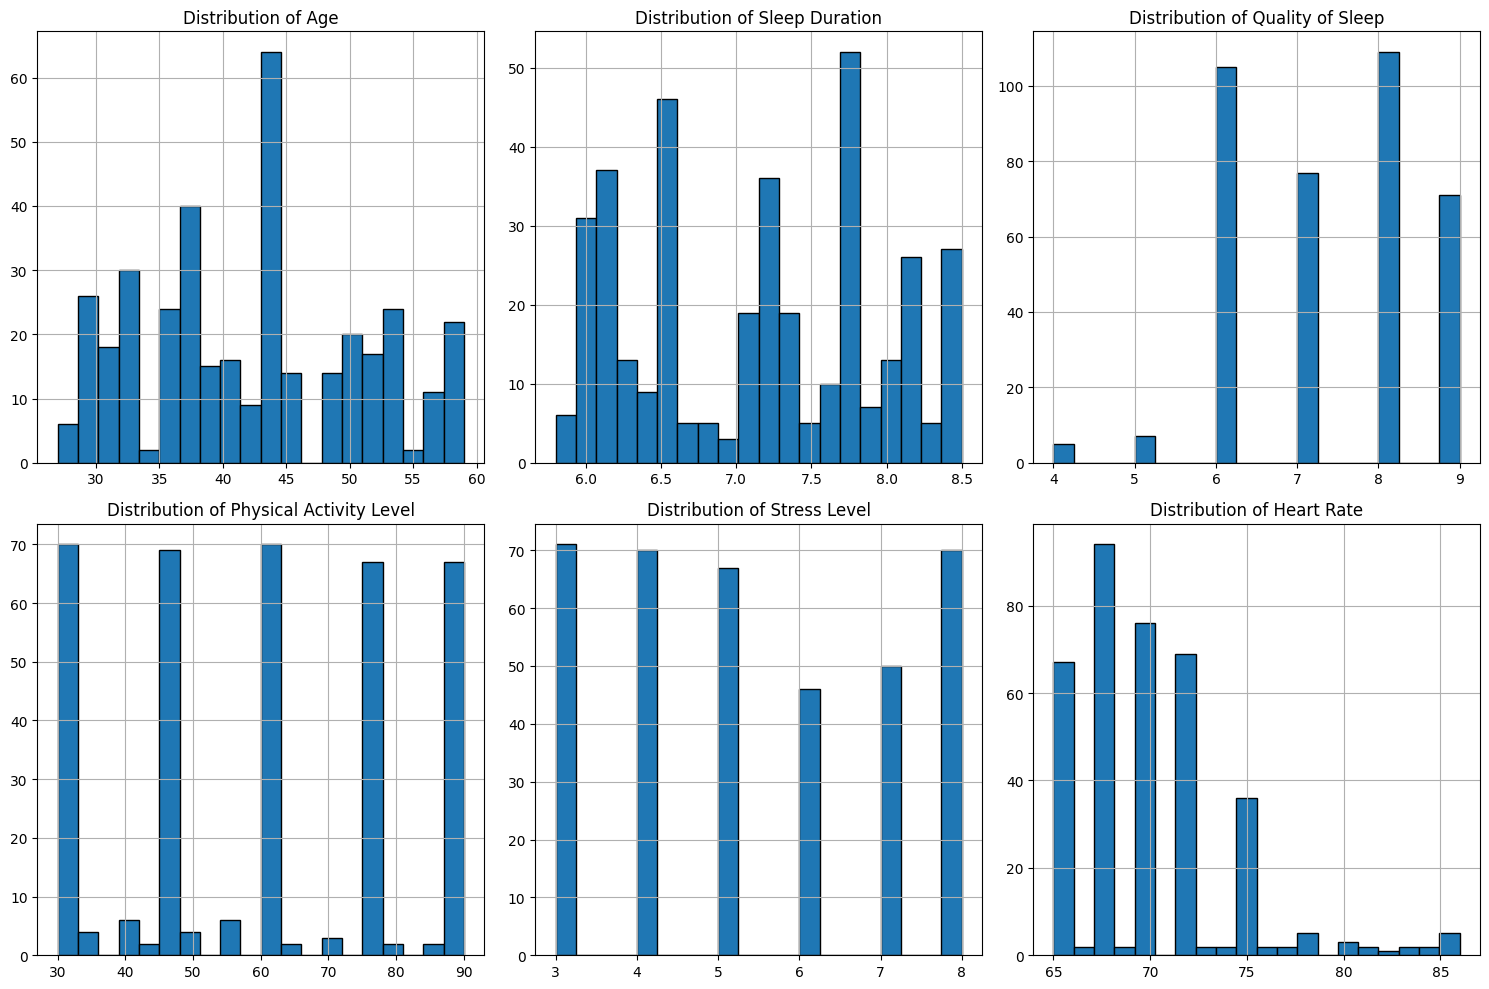

ValueError: no field of name Sleep Duration

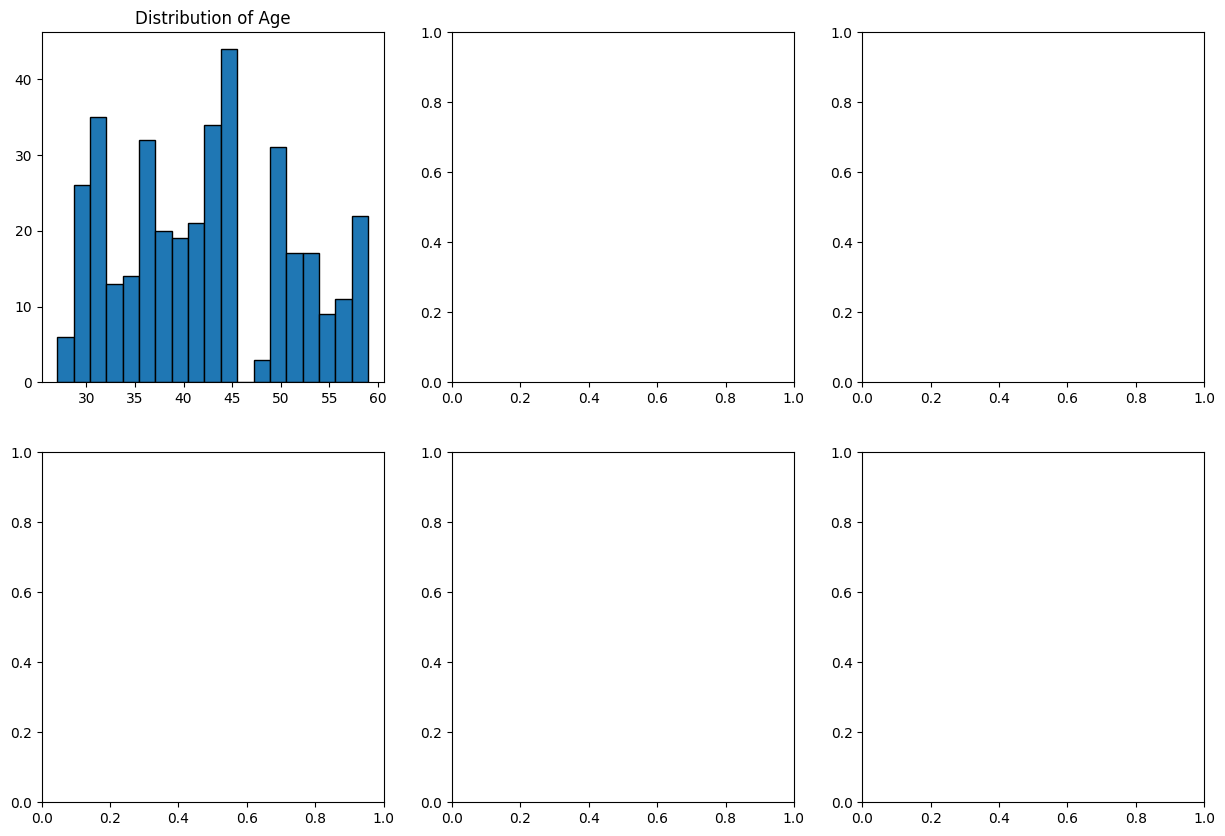

In [85]:
# Write your code for AIM #3 here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sleep_health.csv')
# Create a new figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# Plot the distribution for each variable
axes = axes.flatten()  # Flatten the array of axes for easy iteration
variables = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
for i, var in enumerate(variables):
    df[var].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of {var}')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
# Define the variables you want to plot
variables = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
# Create a new figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# Flatten the array of axes for easy iteration
axes = axes.flatten()
# Plot the distribution for each variable
for i, var in enumerate(variables):
    # Retrieve the data for the current variable
    variable_data = data[var].astype(float)  # Make sure to convert to float if not already
    # Create a histogram for the current variable
    bins = np.linspace(variable_data.min(), variable_data.max(), 20)  # Determine the number of bins
    axes[i].hist(variable_data, bins=bins, edgecolor='black')
    axes[i].set_title(f'Distribution of {var}')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

#To count unique values and their total count in a NumPy array, use 
# np.unique(array_name, return_counts=True)--- This will return two values, one is the unique values and the other is the total count of each unique value
# You will need this for plotting bar plots




# For box plots in NumPy you will need to 
# create a list of variable1, grouped by the unique value of some variable2 (nominal or ordinal), 
# Syntax: variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

